In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# загрузка файла
df = pd.read_csv('https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv')

df.head() # вывод первых пяти строк датасета

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [3]:
df.info() # вывод информации о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [4]:
df.describe() # вывод описательных статистик датасета

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [5]:
# доля пропусков в каждом столбце
# df.isnull().mean() то же самое
df.isna().mean()

,0
user_id,0.00000
age,0.04878
country,0.00000
purchases,0.00000
revenue,0.00000


In [6]:
df[df['age'].isna()] # строки с пропусками

,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
12,13,NaN,US,9,630


In [7]:
# проверка полностью дублирующихся строк
df[df.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [8]:
df[df['user_id'] == 10] # вывод дубликатов

,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


In [9]:
df[df['purchases'] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [10]:
df['country'].unique()

array(['FR', 'RU', 'DE', 'CN', 'US'], dtype=object)

In [11]:
df['revenue'].max(), df['revenue'].min()

(2475, 0)

In [12]:
df[df['revenue'] == 0]

,user_id,age,country,purchases,revenue
6,7,46.0,RU,0,0
10,11,24.0,US,4,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


In [13]:
df['age'].max(), df['age'].min()

(120.0, 5.0)

In [14]:
df[df['age'] == 5]

,user_id,age,country,purchases,revenue
20,21,5.0,RU,8,1488


In [15]:
df['purchases'].max(), df['purchases'].min()

(11, -1)

In [16]:
df[df['purchases'] == -1]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [17]:
df[df['purchases'] == 11]

,user_id,age,country,purchases,revenue
23,24,32.0,DE,11,2475


Пропуски присутствуют только в столбце age: всего 2 пропуска.

Повторяющихся строк: 1 с user_id = 10.

Есть одна строка со странным значением в поле purchases = -1. Что интересно, в этой же строке содержится максимально значение возраста данного набора данных: 120 лет.

Странных значений в столбце country не обнаружено.

Все значения дохода больше или равны нулю. Строк с нулевым доходом 4.

Минимальный возраст: 5 лет, одна строка и ненулевой доход пользователя.

Таким образом, в данных есть пара пропущенных значений, одна повторяющаяся строка и одна странная строка с возрастом пользователя 5 лет и доходом много больше нуля.

In [18]:
# частоты стран
df['country'].value_counts()

,count
country,
RU,13
FR,12
US,8
DE,6
CN,2


In [19]:
# можно предположить, что purchases это ранг, тогда можно посмотреть на частоту значений
df['purchases'].value_counts()

,count
purchases,
7,8
6,8
3,5
5,4
4,4
2,3
0,3
9,2
-1,1


In [20]:
# сгруппируем строки по странам
country_groups = df.groupby(by='country')
# и посмотрим на средний доход по странам
country_groups['revenue'].mean().sort_values()

,revenue
country,
US,557.375000
FR,675.916667
RU,790.076923
CN,1054.000000
DE,1445.500000


In [21]:
# посмотрим также на средний возраст по странам
country_groups['age'].mean().sort_values()

,age
country,
CN,24.000000
RU,30.076923
DE,34.600000
US,36.714286
FR,46.250000


In [22]:
# посмотрим на группы по доходу
cuted = pd.cut(df['revenue'], 3, labels=['Low', 'Medium', 'High'], include_lowest=True)
df['revenue_cat'] = cuted
df['revenue_cat'].value_counts()

,count
revenue_cat,
Low,25
Medium,12
High,4


In [23]:
revenue_groups = df.groupby(by='revenue_cat')
revenue_groups['age'].mean().sort_values()

/tmp/ipython-input-2931933531.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_groups = df.groupby(by='revenue_cat')


,age
revenue_cat,
High,30.500000
Medium,33.545455
Low,38.875000


Больше всего пользователей из России - 13 человек (12 без дубликата), меньше всего в Китае - 2. Если считать, что purchases отражает ранг пользователя (или количество покупок пользователя), что у крайних значений меньше пользователей, чем у тех, что находятся посередине. Средний доход меньше всего у США, больше всего у Германии, разница почти в 3 раза, Россия находится посередине (хотя и непонятно в какой валюте это все считалось, может они разные вообще). Средний возраст пользователя больше всего во Франции - 46 лет, меньше всего в Китае - 24 года.

Больше всего людей в группе с низким доходом - 25 человек, меньше всего с высоким доходом - 4 человека. При этом средний возраст сильно не отличается в зависимости от уровня дохода, но в группе с высоким доходом он наименьший. Думаю, связано с тем, что там всего 4 человека.

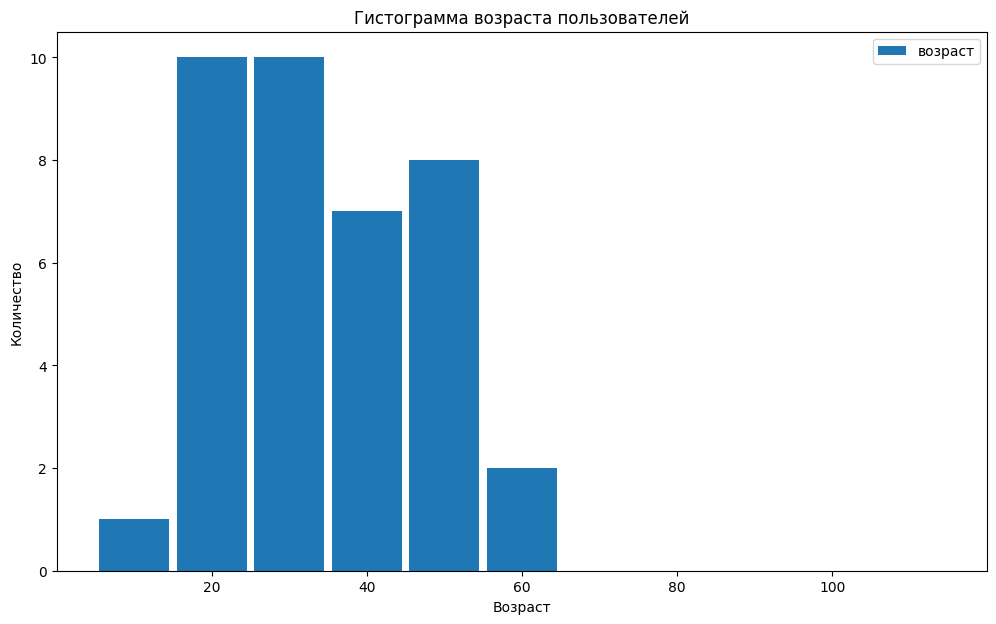

In [90]:
# построение гистограммы
plt.figure(figsize=(12, 7))
plt.hist(df['age'], bins=np.arange(df['age'].min(), df['age'].max(), 10), rwidth=0.9, label='возраст')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Гистограмма возраста пользователей')
plt.legend()
plt.savefig('age_hist.png')
plt.show()

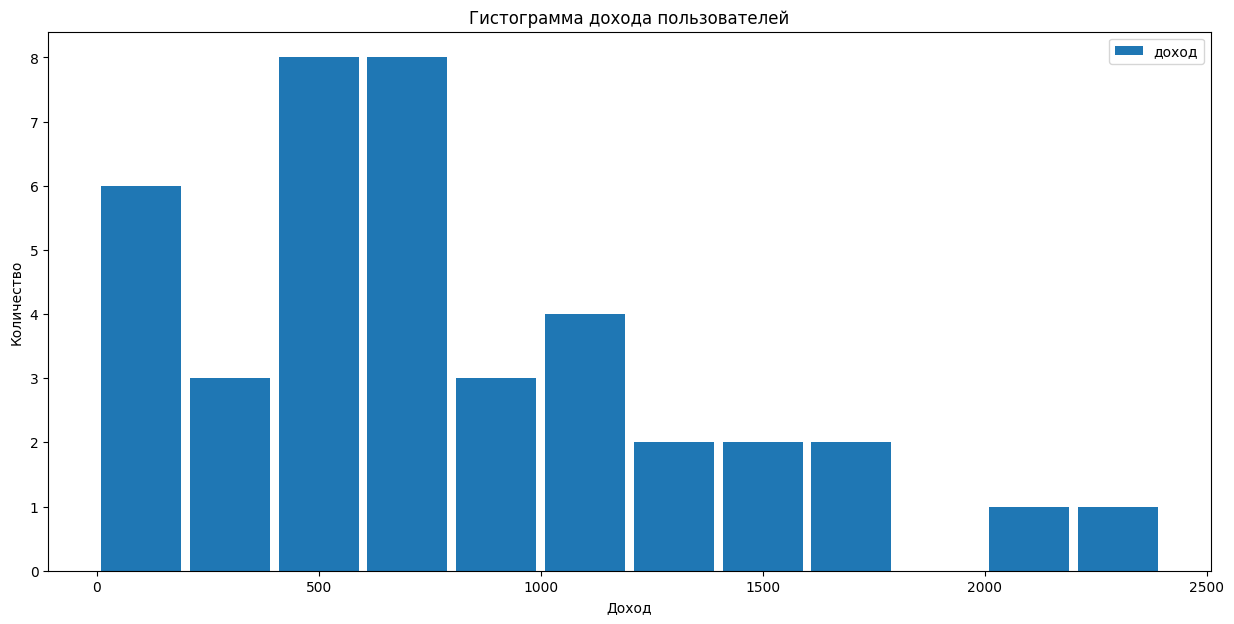

In [91]:
# построение гистограммы доходов
plt.figure(figsize=(15, 7))
plt.hist(df['revenue'], bins=np.arange(df['revenue'].min(), df['revenue'].max(), 200), rwidth=0.9, label='доход')
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.title('Гистограмма дохода пользователей')
plt.legend()
plt.savefig('revenue_hist.png')
plt.show()

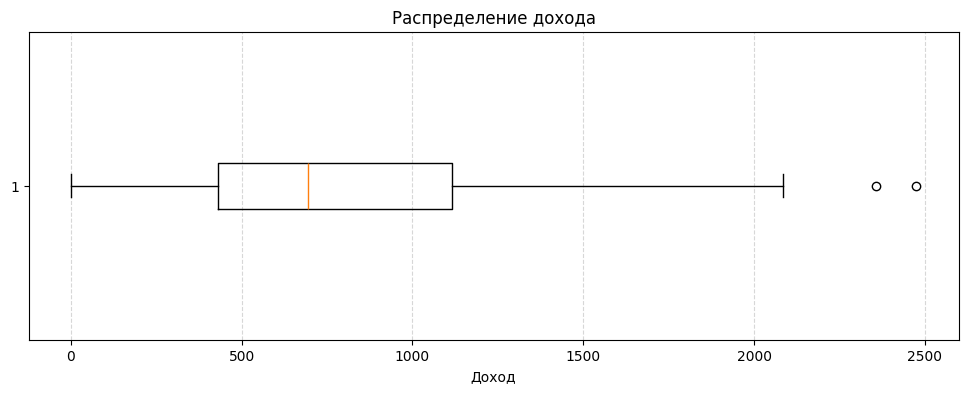

In [92]:
plt.figure(figsize=(12, 4))
plt.boxplot(df['revenue'], orientation='horizontal')
plt.xlabel('Доход')
plt.title('Распределение дохода')
plt.grid(axis='x', alpha=0.5, linestyle='--')
plt.savefig('revenue_boxplot.png')
plt.show()

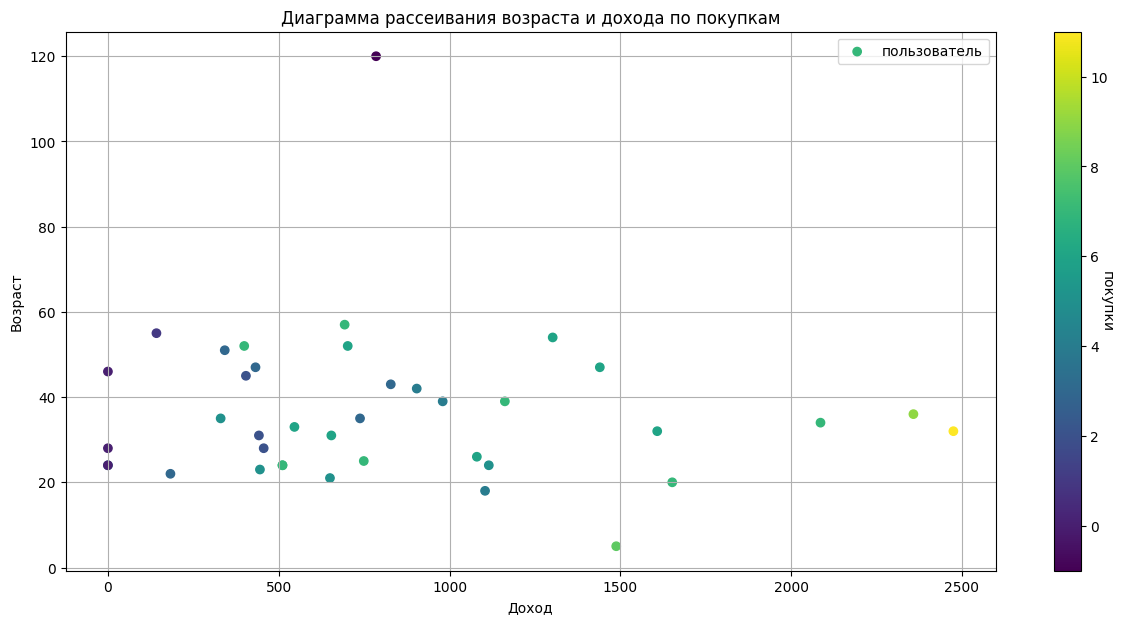

In [93]:
plt.figure(figsize=(15, 7))
plt.scatter(df['revenue'], df['age'], c=df['purchases'], label='пользователь')
clb = plt.colorbar()
clb.ax.set_ylabel(ylabel='покупки', rotation=270)
plt.xlabel('Доход')
plt.ylabel('Возраст')
plt.title('Диаграмма рассеивания возраста и дохода по покупкам')
plt.grid(True)
plt.legend()
plt.savefig('purchases_scatterplot.png')
plt.show()